In [25]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
ls

CONTRIBUTING.md    README.md          Round 2.....ipynb  halfway-there.gif
LICENSE.md         Round 1.ipynb      data/


In [3]:
data = pd.read_csv("data/cleaned_kc_house_data.csv")

In [4]:
data.head()

,Unnamed: 0,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,538000.0,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
1,3,604000.0,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
2,4,510000.0,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
3,5,1230000.0,2014-05-12,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
4,6,257500.0,2014-06-27,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [5]:
data = data.drop(columns=['Unnamed: 0'])

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,0.229984,3.410862,7.663748,1792.775473,1971.111217,82.440236,98077.558241,47.559177,-122.213520,1990.219579,12900.415556
std,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.761324,0.651961,1.172238,828.403502,29.336823,397.212626,53.414906,0.138629,0.140706,684.142495,27977.230059
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,1846.000000,7620.000000
75%,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10107.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df_corr = data.corr()
df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.305489,0.526155,0.706189,0.084504,0.259505,0.274212,0.396862,0.034367,0.664146,0.612014,0.049345,0.122731,-0.049502,0.306607,0.021215,0.581572,0.079402
bedrooms,0.305489,1.000000,0.512243,0.573575,0.025460,0.180485,-0.005833,0.080577,0.020074,0.354243,0.474272,0.153229,0.017430,-0.147255,-0.005917,0.129370,0.390720,0.025217
bathrooms,0.526155,0.512243,1.000000,0.753846,0.080362,0.505187,0.065688,0.180923,-0.130287,0.664748,0.685677,0.504841,0.046988,-0.199625,0.029930,0.222755,0.569290,0.081984
sqft_living,0.706189,0.573575,0.753846,1.000000,0.165336,0.359407,0.111491,0.285506,-0.062319,0.764251,0.876176,0.314220,0.050232,-0.196537,0.058394,0.239521,0.756676,0.176820
sqft_lot,0.084504,0.025460,0.080362,0.165336,1.000000,-0.009924,0.025982,0.077073,-0.016036,0.108950,0.174216,0.051578,0.002147,-0.129494,-0.084304,0.231638,0.145393,0.718489
floors,0.259505,0.180485,0.505187,0.359407,-0.009924,1.000000,0.018382,0.027518,-0.261013,0.459843,0.529101,0.487052,-0.000720,-0.058130,0.058190,0.129769,0.281982,-0.013571
waterfront,0.274212,-0.005833,0.065688,0.111491,0.025982,0.018382,1.000000,0.409773,0.016454,0.083034,0.077165,-0.024068,0.087800,0.030391,-0.015935,-0.042324,0.090588,0.029636
view,0.396862,0.080577,0.180923,0.285506,0.077073,0.027518,0.409773,1.000000,0.046354,0.248679,0.170726,-0.056645,0.098386,0.086479,0.008403,-0.078500,0.277778,0.071496
condition,0.034367,0.020074,-0.130287,-0.062319,-0.016036,-0.261013,0.016454,0.046354,1.000000,-0.147810,-0.157958,-0.366938,-0.060845,0.001685,-0.022250,-0.105823,-0.096336,-0.005139
grade,0.664146,0.354243,0.664748,0.764251,0.108950,0.459843,0.083034,0.248679,-0.147810,1.000000,0.758289,0.443286,0.011795,-0.184120,0.117425,0.200680,0.717031,0.116671


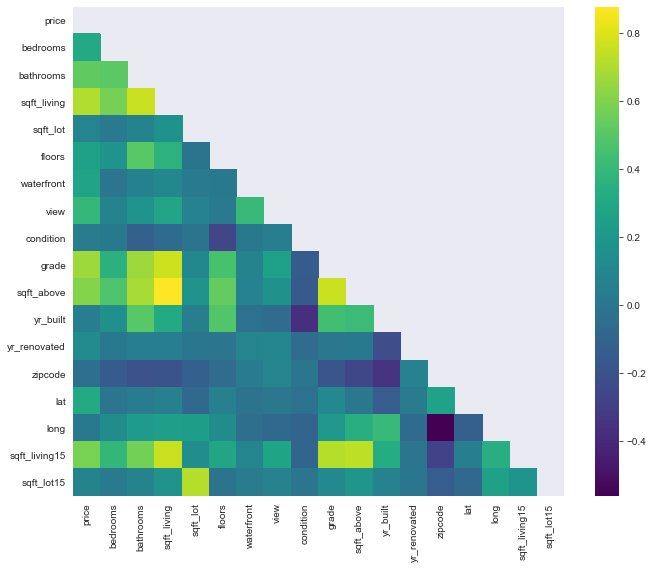

In [8]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, ax=ax1, cmap="viridis");

In [9]:
df=df_corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [10]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876176
"(sqft_living, grade)",0.764251
"(sqft_above, grade)",0.758289
"(sqft_living15, sqft_living)",0.756676
"(bathrooms, sqft_living)",0.753846


### A few lines of code, cleverly using pandas, produces a readable list of variable pairs and their correlation. The code can be scaled in case our predictor base grows.

# Model 1 - Price ~ sqft_above + sqft_living:

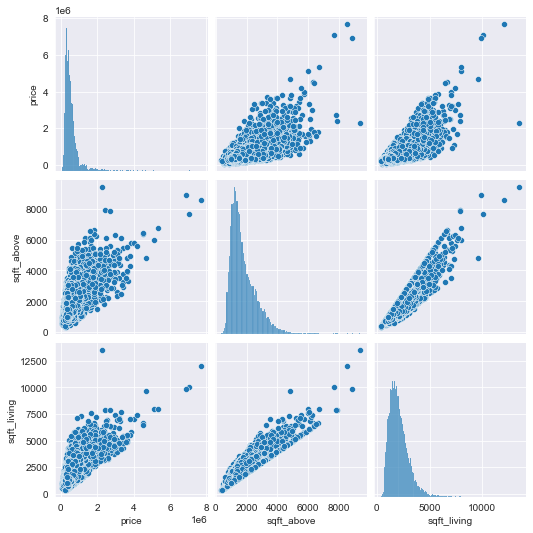

In [11]:
model_pair1_cols = ['price','sqft_above', 'sqft_living']
model1_pair1_df = data[model_pair1_cols]
sns.pairplot(model1_pair1_df);

In [12]:
fsm_df1 = model1_pair1_df.copy()
fsm_df1.dropna(inplace=True)

In [13]:
fsm1 = ols(formula ="price ~ sqft_above + sqft_living", data=fsm_df1)
fsm_results1 = fsm1.fit()

In [14]:
fsm_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     7845.
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:08:17   Log-Likelihood:            -2.1910e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15759   BIC:                         4.382e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.327e+04   5260.979    -10.125      0.000   -6.36e+04    -4.3e+04
sqft_above    -13.0205      5.257     -2.477      0.013     -23.324      -2.717
sqft_living   296.4372      4.741     62.532      0.000     287.145     305.729
==============================================================================
Omnibus:                    11124.255   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           456859.299
Skew:                           2.905   Prob(JB):                         0.00
Kurtosis:                      28.727   Cond. No.                     7.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sqft_above = square footage of house apart from basement and sqft_basement = square footage of the basement

#  Model 1, Pair 1 Evaluation:

We are explaining about 50% of the variance in home price, but we only had two features so far and it's statistically significant at an alpha of 0.05.

According to our model:

 - A home price is expected to have an average price of ????
 
 - For each additional average square footage of house apart from basement, we expect home prices to decrease by 13.0205
 - For each additional average square footage of the basement, we expect home prices to increase by $296

### Linearity for Model 1, Pair 1:

In [15]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results1)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0342665386165044
Rainbow p-value: 0.06741829699152567


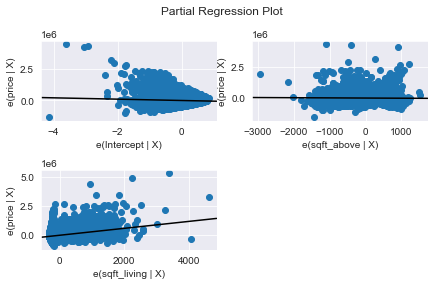

In [16]:
fig = sm.graphics.plot_partregress_grid(fsm_results1)
fig.tight_layout(pad=1.0)

##### The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. 

##### Thus returning a p-value above .05 means that the current model meets the linearity assumption.

### Normality for Model 1, Pair 1:

Jarque-Bera (JB): 456859.299

Prob(JB): 0.00

#### Linear regression assumes that the residuals are normally distributed. The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. 

#### Thus returning a low p-value means that the current model violates the normality assumption.

### Homoscadasticity for Model 1, Pair 1:

Linear regression assumes that the variance of the dependent variable is homogeneous across different value of the independent variable(s). 

We can visualize this by looking at the predicted life expectancy vs. the residuals.

The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. 

Thus returning a low p-value means that the current model violates the homoscedasticity assumption

In [19]:
y = fsm_df1["price"]
y_hat = fsm_results1.predict()

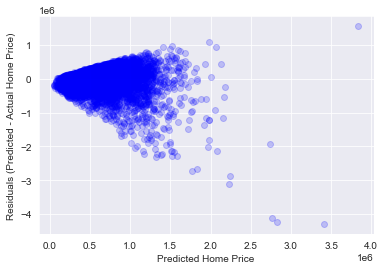

In [21]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Home Price",
        ylabel="Residuals (Predicted - Actual Home Price)")
ax2.scatter(x = y_hat, y = y_hat-y, color="blue", alpha=0.2);

In [35]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df1[['sqft_above', 'sqft_living']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


### Independence for Model 1, Pair 1:

You might have noticed in the regression output that there was a warning about the condition number being high. The condition number is a measure of stability of the matrix used for computing the regression (we'll discuss this more in the next module), and a number above 30 can indicate strong multicollinearity. Our output is way higher than that.

In [36]:
rows = fsm_df1[['sqft_above', 'sqft_living']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(2)]
vif_df["feature"] = ['sqft_above', 'sqft_living']

vif_df

,VIF,feature
0,23.946796,sqft_above
1,23.946796,sqft_living


##### A "rule of thumb" for VIF is that 5 is too high, so I think it's reasonable to say that we are violating the independence assumption, despite the high condition number.

# Summary for Model 1, Pair 1


We started with a baseline model where the only input feature was Schooling. Our baseline model had an r-squared of 0.565. This model violated the linearity (p < 0.001), normality (p < 0.001), and homoscadasticity (p < 0.001) assumptions of linear regression. The independence assumption was met by default because there was only one input feature.

The final model for this lesson had three input features: Schooling, Adult_Mortality, and Status_Encoded. It had an r-squared of 0.718. This model did not violate the linearity assumption (p = 0.084), but it did violate the normality (p < 0.001) and homoscedasticity (p < 0.001) assumptions. Based on the variance inflaction factor metric, it did not violate the independence assumption.

We are able to address the following questions from above:

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

With only 2 features we are able to explain about 71% of the variance in life expectancy. This indicates that these factors truly are explanatory. More analysis is required to understand how much additional explanatory power would be provided by incorporating additional features into the model.

3. How does Infant and Adult mortality rates affect life expectancy?

So far we have only investigated adult mortality. The adult mortality rate ("probability of dying between 15 and 60 years per 1000 population") has a negative correlation with life expectancy. For each increase of 1 in the adult mortality rate, life expectancy decreases by about .03 years.

5. What is the impact of schooling on the lifespan of humans?

In our latest model, we find that each additional year of average schooling is associated with 1.4 years of added life expectancy. However it is challenging to interpret whether it is schooling that is actually having the impact. Schooling is highly correlated with Income_Composition_of_Resources ("Human Development Index in terms of income composition of resources") so it is very possible that schooling is the result of some underlying factor that also impacts life expectancy, rather than schooling impacting life expectancy directly.